Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from \MyModel\CNNModel
[[ 0.81632656  0.83673471  0.8639456   0.82993197  0.82312924  0.8639456
   0.87755102  0.87074828  0.85714287  0.84353739  0.85034013  0.81632656
   0.78231293  0.80272108  0.85034013  0.90476191  0.87755102  0.82993197
   0.79591835  0.80272108  0.85714287  0.8639456   0.87074828  0.88435376
   0.89115644  0.89795917  0.87755102  0.8639456 ]
 [ 0.87074828  0.85714287  0.85034013  0.87755102  0.89115644  0.8639456
   0.84353739  0.82993197  0.85714287  0.8639456   0.85714287  0.85714287
   0.8639456   0.85714287  0.87755102  0.90476191  0.89795917  0.89115644
   0.88435376  0.87755102  0.87755102  0.85714287  0.84353739  0.85714287
   0.87755102  0.90476191  0.90476191  0.89795917]
 [ 0.85034013  0.82993197  0.80272108  0.89115644  0.92517

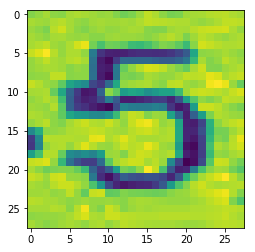

[2]


"\nvideo = cv2.VideoCapture(0)\nwhile(True):\n    ret, frame = video.read()   \n    \n    cv2.imshow('test', frame)\n    cv2.waitKey(5)\n\n"

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
sess=tf.Session()    
saver = tf.train.import_meta_graph('C:\\MyModel\\CNNModel.meta')
saver.restore(sess,tf.train.latest_checkpoint('C:\\MyModel'))

graph = tf.get_default_graph()
training_data = graph.get_tensor_by_name("training_data:0")
training_labels = graph.get_tensor_by_name("training_labels:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")

predict = graph.get_tensor_by_name("predicted_number:0")

originalimg = cv2.imread("Five.jpg")
gray = cv2.cvtColor(originalimg, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, dsize =(28, 28))
nump = np.asarray(resize, np.float32)
nump = (nump -np.min(nump))/(np.max(nump) - np.min(nump))
print(nump)
plt.imshow(nump)
plt.show()

prediction = sess.run(predict, feed_dict ={training_data: [nump.flatten()] ,training_labels: [[0,0,0,0,0,0,0,0,0,1]], keep_prob: 1})
print(prediction)
'''
video = cv2.VideoCapture(0)
while(True):
    ret, frame = video.read()   
    
    cv2.imshow('test', frame)
    cv2.waitKey(5)

'''
